### 4.1.5 Programming the Forward Euler scheme; the general case

The Forward Euler method is defined as

$$ u^{n+1} = ru^{n}(t_{n+1}-t_n)+u^{n} = u^{n} + \Delta tru^{n}$$

The good thing about the Forward Euler method is that it gives an understanding of what a differential equation is and a geometrical picture of how to construct the solution.

Our previous program was just a flat main program tailored to a special differential equation.

When programming mathematics, it is always good to consider a (large) class of problems and making a Python function to solve any problem that fits into the class.

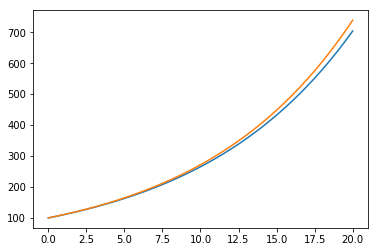

In [5]:
from numpy import linspace, zeros, exp
import matplotlib.pyplot as plt

def ode_FE(f, U_0, dt, T):
    N_t = int(round(float(T)/dt))
    u = zeros(N_t+1)
    t = linspace(0, N_t*dt, len(u))
    u[0] = U_0
    for n in range(N_t):
        u[n+1] = u[n] + dt*f(u[n], t[n])
    return u, t

def demo_population_growth():
    """Test case: u'=r*u, u(0)=100. """
    def f(u, t):
        return 0.1*u
    
    u, t = ode_FE(f=f, U_0=100, dt=0.5, T=20)
    plt.plot(t, u, t, 100*exp(0.1*t))
    plt.show()
    
if __name__ == '__main__':
    demo_population_growth()

We make software for the class of differential equation problems of the form


$$ u'(t) = f(u,t), \qquad u = U_0, t \in [0,T], $$

for some given function $f$, and numbers $U_0$ and $T$. The Python function calculating the solution must take $f, U_0, \Delta t$, and $T$ as input, find the corresponding $N_t$, compute the solution, and return and array with $u^0, u^1, \ldots , u^{N_t}$ and an array with $t_0, t_1, \ldots, t_{N_t}$.

The Forward Euler scheme reads
$$ u^{n+1} = u^{n} + \Delta tf(u^{n},t_n), \qquad n = 0, \ldots, N_{t}-1$$